In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [12]:
path_in = "twitterClimateData.csv"
df = pd.read_csv(path_in, delimiter=";")
df = df.sample(1000)
df = df[pd.notnull(df["text"])]

In [13]:
col = ["search_hashtags", "text"]
df = df[col]
df = df[pd.notnull(df["text"])]
df.columns = ["search_hashtags", "text"]
df['category_id'] = df["search_hashtags"].factorize()[0]
category_id_df = df[["search_hashtags", 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', "search_hashtags"]].values)
df.head()

,search_hashtags,text,category_id
63524,#climatestrike,Here in #Philly for the #ClimateStrike in supp...,0
15291,#climatecrisis,At a time when we are facing electricity and #...,1
67890,#greennewdeal,Honored to be a part of @sunrisemvmtphilly’s #...,2
22480,#climatestrike,CLIMATE ACTION NOW! Climate Strike Happening N...,0
30475,#climateaction,Great to see energy in discussions today @UN #...,3


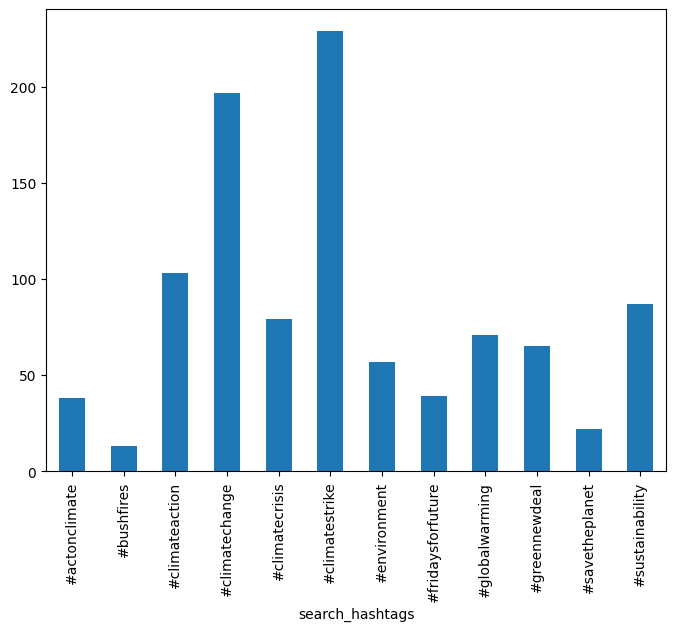

In [18]:
fig = plt.figure(figsize=(8,6))
df.groupby("search_hashtags").text.count().plot.bar(ylim=0)
plt.show()


In [19]:
df.groupby("search_hashtags").text.count()

search_hashtags
#actonclimate         38
#bushfires            13
#climateaction       103
#climatechange       197
#climatecrisis        79
#climatestrike       229
#environment          57
#fridaysforfuture     39
#globalwarming        71
#greennewdeal         65
#savetheplanet        22
#sustainability       87
Name: text, dtype: int64

In [20]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape

(1000, 588)

In [25]:
N = 2
for search_hashtags, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(search_hashtags))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '#actonclimate':
  . Most correlated unigrams:
. faith
. actonclimate
  . Most correlated bigrams:
. fossil fuels
. climate crisis
# '#bushfires':
  . Most correlated unigrams:
. australia
. bushfires
  . Most correlated bigrams:
. sydney australia
. australia https
# '#climateaction':
  . Most correlated unigrams:
. hundreds
. climateaction
  . Most correlated bigrams:
. climatechangeisreal climateaction
. climateaction climatecrisis
# '#climatechange':
  . Most correlated unigrams:
. climatestrike
. climatechange
  . Most correlated bigrams:
. climate change
. climatechange climatechangeisreal
# '#climatecrisis':
  . Most correlated unigrams:
. climatebreakdown
. climatecrisis
  . Most correlated bigrams:
. climatecrisis climatestrike
. climatechange climatecrisis
# '#climatestrike':
  . Most correlated unigrams:
. climatechange
. climatestrike
  . Most correlated bigrams:
. climatestrike today
. city hall
# '#environment':
  . Most correlated unigrams:
. nature
. environment
  . M

In [50]:
count_vect = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["search_hashtags"], random_state = 0)

In [27]:
X_train.count()

750

In [28]:
X_test

63817    Come to the #FridaysForFurture rally tomorrow ...
11796    https://www.npr.org/2019/03/28/707506544/air-f...
57888    Biden’s record on #ClimateChange is not good a...
44437    Biodiesel is a clean burning fuel producer fro...
29043    “Come senators, congressmen Please heed the ca...
                               ...                        
6692     Working at the Community pool today. My sweat ...
68322    Fitting end to #DeepCarb19 at a Halloween part...
67890    Honored to be a part of @sunrisemvmtphilly’s #...
23387    Week One of #Fridays4Future #ClimateStrike at ...
67750    HUGE applause for this @EdMarkey line: “We are...
Name: text, Length: 250, dtype: object

In [29]:
y_train.count()

750

In [30]:
y_test.count()

250

In [31]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [32]:
print(X_train_counts)

  (0, 1284)	1
  (0, 1291)	1
  (0, 4159)	1
  (0, 2611)	1
  (0, 4846)	3
  (0, 1101)	1
  (0, 919)	1
  (0, 631)	2
  (0, 3600)	1
  (0, 4513)	1
  (0, 5358)	1
  (0, 1261)	1
  (0, 4942)	1
  (0, 5071)	1
  (0, 2568)	1
  (0, 707)	1
  (0, 3778)	1
  (0, 441)	1
  (0, 3456)	1
  (0, 816)	1
  (0, 2704)	1
  (0, 2988)	1
  (0, 3536)	1
  (0, 5287)	1
  (0, 3564)	1
  :	:
  (748, 4398)	1
  (748, 601)	1
  (748, 4477)	1
  (748, 3081)	1
  (748, 2846)	1
  (748, 4305)	1
  (748, 1702)	1
  (748, 2714)	1
  (748, 3775)	1
  (748, 2881)	1
  (748, 1636)	1
  (748, 5069)	1
  (748, 3867)	1
  (748, 1348)	1
  (748, 620)	1
  (748, 4163)	1
  (748, 3264)	1
  (748, 2895)	1
  (749, 1101)	1
  (749, 1093)	1
  (749, 5459)	1
  (749, 1087)	1
  (749, 2250)	1
  (749, 2313)	1
  (749, 1536)	1


In [33]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [34]:
print(X_train_tfidf)

  (0, 5358)	0.12393473218522712
  (0, 5287)	0.17598346845514803
  (0, 5071)	0.2411291396882208
  (0, 4942)	0.06639410381928781
  (0, 4846)	0.17804226393497521
  (0, 4513)	0.20289334968147105
  (0, 4159)	0.20289334968147105
  (0, 3778)	0.2411291396882208
  (0, 3600)	0.2411291396882208
  (0, 3578)	0.1734042356445165
  (0, 3564)	0.15612638727845207
  (0, 3536)	0.15322439744755037
  (0, 3456)	0.13276723733767037
  (0, 2988)	0.2170050421216522
  (0, 2704)	0.1787692521149024
  (0, 2611)	0.0783350769867039
  (0, 2568)	0.13434949689032347
  (0, 2297)	0.22701744724803968
  (0, 1588)	0.2411291396882208
  (0, 1291)	0.22701744724803968
  (0, 1284)	0.2092388173511699
  (0, 1261)	0.2170050421216522
  (0, 1101)	0.10639695941519653
  (0, 919)	0.22701744724803968
  (0, 816)	0.22701744724803968
  :	:
  (748, 2989)	0.18492162792182545
  (748, 2895)	0.21310574020163153
  (748, 2894)	0.34914421138955476
  (748, 2881)	0.19178528231227293
  (748, 2846)	0.15325164780541875
  (748, 2734)	0.0731957269362635
  (

In [35]:
y_train.count()

750

In [43]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [37]:
print(clf)

MultinomialNB()


In [38]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['#climatestrike']
